In [1]:
import numpy as np
from stateinterpreter import Classifier, identify_metastable_states, load_dataframe, descriptors_from_traj, sample
from stateinterpreter.plot import plot_states
#Paranoia
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

Helper functions to define groups.

In [2]:
kBT = 2.5
BPTI_data_path = '../../../data/md_datasets/BPTI-unbiased/'
colvar_file = BPTI_data_path + 'COLVAR'
traj_dict = {
        'trajectory' : BPTI_data_path+'all_trj_10ns.trr',
        'topology' : BPTI_data_path+'bpti-protein.pdb'
    }
#Load Descriptors
#desc_path = '../../../data/md_datasets/BPTI-unbiased/descritpors.pkl'
#descriptors = pd.read_pickle(desc_path)
colvar = load_dataframe(colvar_file).drop(['idx', 'time'], axis=1)

In [3]:
descriptors, feats_info = descriptors_from_traj(traj_dict, descriptors=['hbonds_contacts'])

Computing Hydrogen bonds contacts
Donors: [0, 7, 9, 10, 40, 52, 72, 82, 101, 144, 155, 165, 170, 179, 200, 210, 218, 232, 242, 249, 251, 252, 266, 285, 304, 311, 313, 314, 328, 339, 349, 369, 380, 390, 397, 404, 414, 422, 436, 446, 453, 472, 482, 490, 499, 504, 513, 533, 549, 560, 570, 577, 584, 594, 601, 603, 604, 618, 628, 636, 650, 657, 659, 660, 674, 681, 688, 695, 702, 722, 730, 744, 749, 755, 765, 780, 792, 802, 819, 826, 828, 829, 843, 848, 857, 867, 874, 881]
Acceptors: [  0   3   7   9  10  26  29  40  43  46  47  52  55  72  75  82  85 101
 104 108 109 116 119 130 133 144 147 155 165 168 170 179 182 186 189 200
 203 210 213 218 232 235 242 245 249 251 252 266 269 285 288 304 307 311
 313 314 328 331 339 349 352 369 372 380 390 393 396 397 404 407 414 417
 422 436 439 446 449 453 456 472 475 482 485 489 490 499 502 504 513 516
 533 536 549 552 560 570 573 577 580 584 587 594 597 601 603 604 618 621
 628 631 636 650 653 657 659 660 674 677 680 681 688 691 694 695 702 705
 722 7

In [5]:
cv_list = ['tica1', 'tica2']
kBT = 2.5
states_labels = identify_metastable_states(colvar, cv_list, kBT, bw_method=0.08, fes_cutoff=kBT)

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 4 local minima with selected populations:
	Basin 0 -> 23134 configurations.
	Basin 1 -> 58421 configurations.
	Basin 2 -> 1067 configurations.
	Basin 3 -> 1302 configurations.


(<Figure size 480x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Metastable states identification'}, xlabel='tica1', ylabel='tica2'>)

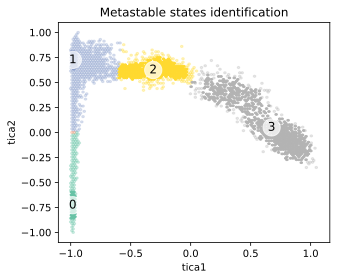

In [6]:
plot_states(colvar, states_labels, cv_list, fes_isolines = False)

In [7]:
regularizers = np.geomspace(0.1, 10, 12)
#regularizers = 10**(-0.5)
#select_feat = 'sin_|cos_'
sample_obj, features_names, classes_names = sample(descriptors, states_labels, 100, states_subset=[0,1], states_names=["Low", 'Hi'])
#groups = [feats_info[name]['group'] for name in features_names]
classifier = Classifier(sample_obj, features_names, classes_names)
classifier.compute(regularizers, max_iter = 10000)#, groups=groups)

Optimizing Lasso Estimator:   0%|          | 0/12 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.3min finished
Optimizing Lasso Estimator:   8%|▊         | 1/12 [01:17<14:07, 77.02s/it]

convergence after 4959 epochs took 77 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished
Optimizing Lasso Estimator:  17%|█▋        | 2/12 [01:19<05:33, 33.35s/it]

convergence after 175 epochs took 2 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.5s finished
Optimizing Lasso Estimator:  25%|██▌       | 3/12 [01:24<03:01, 20.19s/it]

convergence after 287 epochs took 5 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.0s finished
Optimizing Lasso Estimator:  33%|███▎      | 4/12 [01:35<02:12, 16.55s/it]

convergence after 706 epochs took 11 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.1s finished
Optimizing Lasso Estimator:  42%|████▏     | 5/12 [01:42<01:31, 13.13s/it][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
Optimizing Lasso Estimator:  58%|█████▊    | 7/12 [01:42<00:32,  6.52s/it]

convergence after 453 epochs took 7 seconds
convergence after 3 epochs took 0 seconds
convergence after 4 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
Optimizing Lasso Estimator:  75%|███████▌  | 9/12 [01:42<00:11,  3.80s/it][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
Optimizing Lasso Estimator: 100%|██████████| 12/12 [01:42<00:00,  8.57s/it]

convergence after 1 epochs took 0 seconds
convergence after 3 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds


Number of groups vs. regularization strength $\lambda$

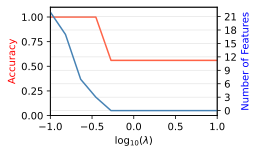

In [8]:
classifier.plot();

In [9]:
regularizers = np.geomspace(0.01, 1, 25)
sample_obj, features_names, classes_names = sample(descriptors, states_labels, 10000, states_subset=[0,1], states_names=["Low", 'Hi'])
pruned_classifier = classifier.prune(10**(-0.5))
pruned_classifier.compute(regularizers, max_iter= 10000)

Optimizing Lasso Estimator:   0%|          | 0/25 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs

convergence after 44 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 13 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 15 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.


convergence after 16 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds


Accuracy: 100%
State Low:
[61.368%]  HB_CONTACT TYR35-OHs -- CYS38-N
[35.708%]  HB_CONTACT CYS14-N -- GLY36-O
[2.924% ]  HB_CONTACT THR11-N -- CYS38-O
State Hi:
[61.368%]  HB_CONTACT TYR35-OHs -- CYS38-N
[35.708%]  HB_CONTACT CYS14-N -- GLY36-O
[2.924% ]  HB_CONTACT THR11-N -- CYS38-O


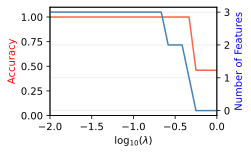

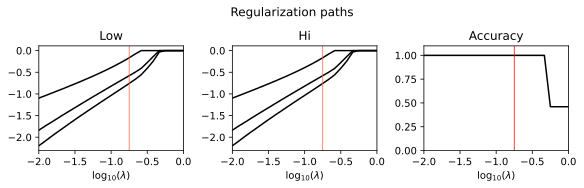

In [10]:
reg = 10**(-0.75)
pruned_classifier.print_selected(reg)
pruned_classifier.plot();
pruned_classifier.plot_regularization_path(reg);

In [18]:
classifier.prune(reg)
classifier.compute(regularizers, max_iter = 10000)

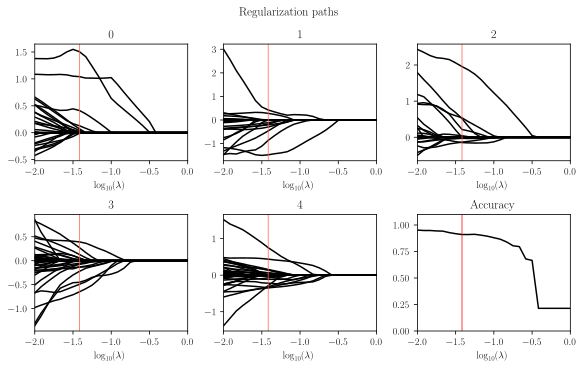

In [19]:
classifier.plot(reg);

In [20]:
classifier.prune(reg)
classifier.compute(regularizers, max_iter = 10000, quadratic_kernel=True)

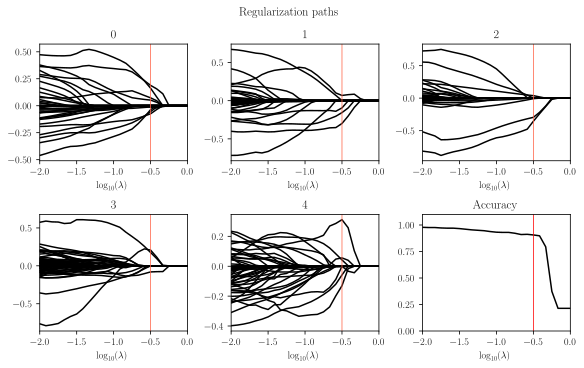

In [22]:
reg = 10**(-0.5)
classifier.plot(reg);